In [890]:
import pandas as pd
from gensim.models import Word2Vec, KeyedVectors
import copy
import numpy as np
import nltk
import matplotlib.pyplot as plt

In [891]:
#constantes:
num_clusters = 700

In [892]:
#pegando o dataframe
df = pd.read_csv('data/laptop_filtered_aspect_sample.csv')
df

,aspect_name
0,laptop
1,use
2,computer
3,screen
4,price
...,...
7330,cool feature
7331,professional laptop
7332,professional life
7333,professional look


In [893]:
words = df.values.tolist()
clean_words = []
clean_vector = []
for word in words:
    clean_words.append(nltk.word_tokenize(word[0]))
for word in words:
    clean_vector.append(word[0].split(" "))

In [910]:
#treinando o modelo de wordvec
model = Word2Vec(sg=0, ns_exponent=0.75,min_count=1, size=32, workers=1,seed=7)
model.build_vocab(clean_words, progress_per=10000)
model.train(clean_words, total_examples=model.corpus_count, epochs=60, report_delay=1)

(663266, 720900)

In [911]:
np_vector = []
np_label = []
for vec in clean_vector:
    count = 0
    string = ''
    aux = []
    exist = False
    for word in vec:
        if word in  model.wv.vocab:
            string += word + ' '
            aux.append(model[word])
            exist = True
    if exist:
        aux = sum(aux)/len(aux)
        np_vector.append(aux)
        np_label.append(string)

C:\Users\Laura\Anaconda3\envs\pnl\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


In [912]:
#colocando o modelo do TSNE 
from sklearn.manifold import TSNE
SNEt = TSNE(n_components=2, random_state=4)
tsne_data = SNEt.fit_transform(np_vector)

In [913]:
tsne_word = []
for key, tupla in enumerate(tsne_data):
    tsne_word.append(tsne_data[key].tolist())
    tsne_word[key].append(np_label[key])
tsne_word[:5]

[[-13.880807876586914, 45.260623931884766, 'laptop '],
 [-23.83567237854004, 34.53169250488281, 'use '],
 [-13.794401168823242, 46.060638427734375, 'computer '],
 [-39.60808563232422, 4.042677879333496, 'screen '],
 [-15.035504341125488, 47.118873596191406, 'price ']]

In [898]:
sne_pd = pd.DataFrame(tsne_word, columns=['X','Y','Word'])
sne_pd.head()

,X,Y,Word
0,-13.880808,45.260624,laptop
1,-23.835672,34.531693,use
2,-13.794401,46.060638,computer
3,-39.608086,4.042678,screen
4,-15.035504,47.118874,price


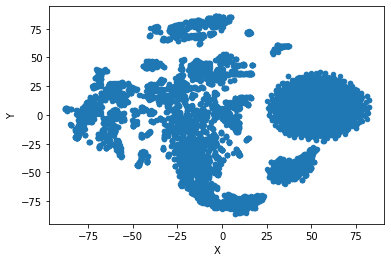

In [914]:
sne_pd.plot.scatter(x='X',y='Y')
plt.show()

In [922]:
#usando k-means
from sklearn.cluster import KMeans
%matplotlib inline

In [923]:
#testando agora com a clusterizacao depois do tsne

In [924]:
#treinando o modelo
clustering = KMeans(n_clusters=num_clusters, random_state=8)
clustering.fit(sne_pd[['X','Y']])
predictClusterKMeans = clustering.predict(sne_pd[['X','Y']])

In [925]:
#achando os centroides
centersKmeans = clustering.cluster_centers_
centersKmeans = pd.DataFrame(centersKmeans,columns=['X','Y'])
centersKmeans.head(5)

,X,Y
0,-18.326284,-55.786588
1,-12.932637,35.168189
2,45.832678,4.239372
3,-68.668551,1.555568
4,32.746744,-39.797003


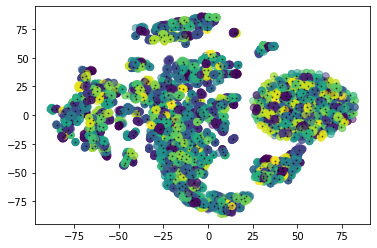

In [926]:
#plotando a resposta
plt.scatter(sne_pd['X'], sne_pd['Y'], c=predictClusterKMeans, s=50, alpha=0.5)
plt.scatter(centersKmeans['X'], centersKmeans['Y'], c='black', s=1, alpha=0.5)
plt.show()


In [927]:
sne_pd['Group'] = predictClusterKMeans
sne_pd = sne_pd.sort_values('Group')
sne_pd.head()

,X,Y,Word,Group
6284,-19.045496,-56.294033,white line,0
2822,-17.464218,-55.834400,tech guy,0
6043,-17.951324,-54.304596,modern designer,0
6936,-19.099421,-54.759167,technical details,0
2859,-18.433279,-55.334919,surface dock,0


In [928]:
sne_pd.loc[sne_pd['Group'] == 10]

,X,Y,Word,Group
6940,-6.799845,-26.244595,efficient delivery,10
6972,-6.754728,-25.744017,timely delivery,10
841,-8.623834,-24.860435,macbook air,10
3555,-7.060412,-26.520563,shipping label,10
135,-6.996460,-24.792196,setup,10
2026,-7.266944,-24.548107,setup process,10
5480,-6.634721,-26.259035,delivery date,10
6621,-8.436641,-25.004559,chromebook pixel,10
4075,-7.161529,-26.718624,load times,10
3486,-8.429570,-25.013292,hp chromebook,10


In [907]:
import glob
files_present = True
while(files_present):
    name = input('nome que deseja para o arquivo resposta:')
    filename = name + '.csv'
    files_present = glob.glob(filename)
    if not files_present:
        sne_pd.to_csv(filename, encoding='utf-8', index=False, columns=['Word','Group'])
        files_present = False
    else:
        print('Esse Arquivo Já Existe, Tente novamente') 
        


nome que deseja para o arquivo resposta:o


0